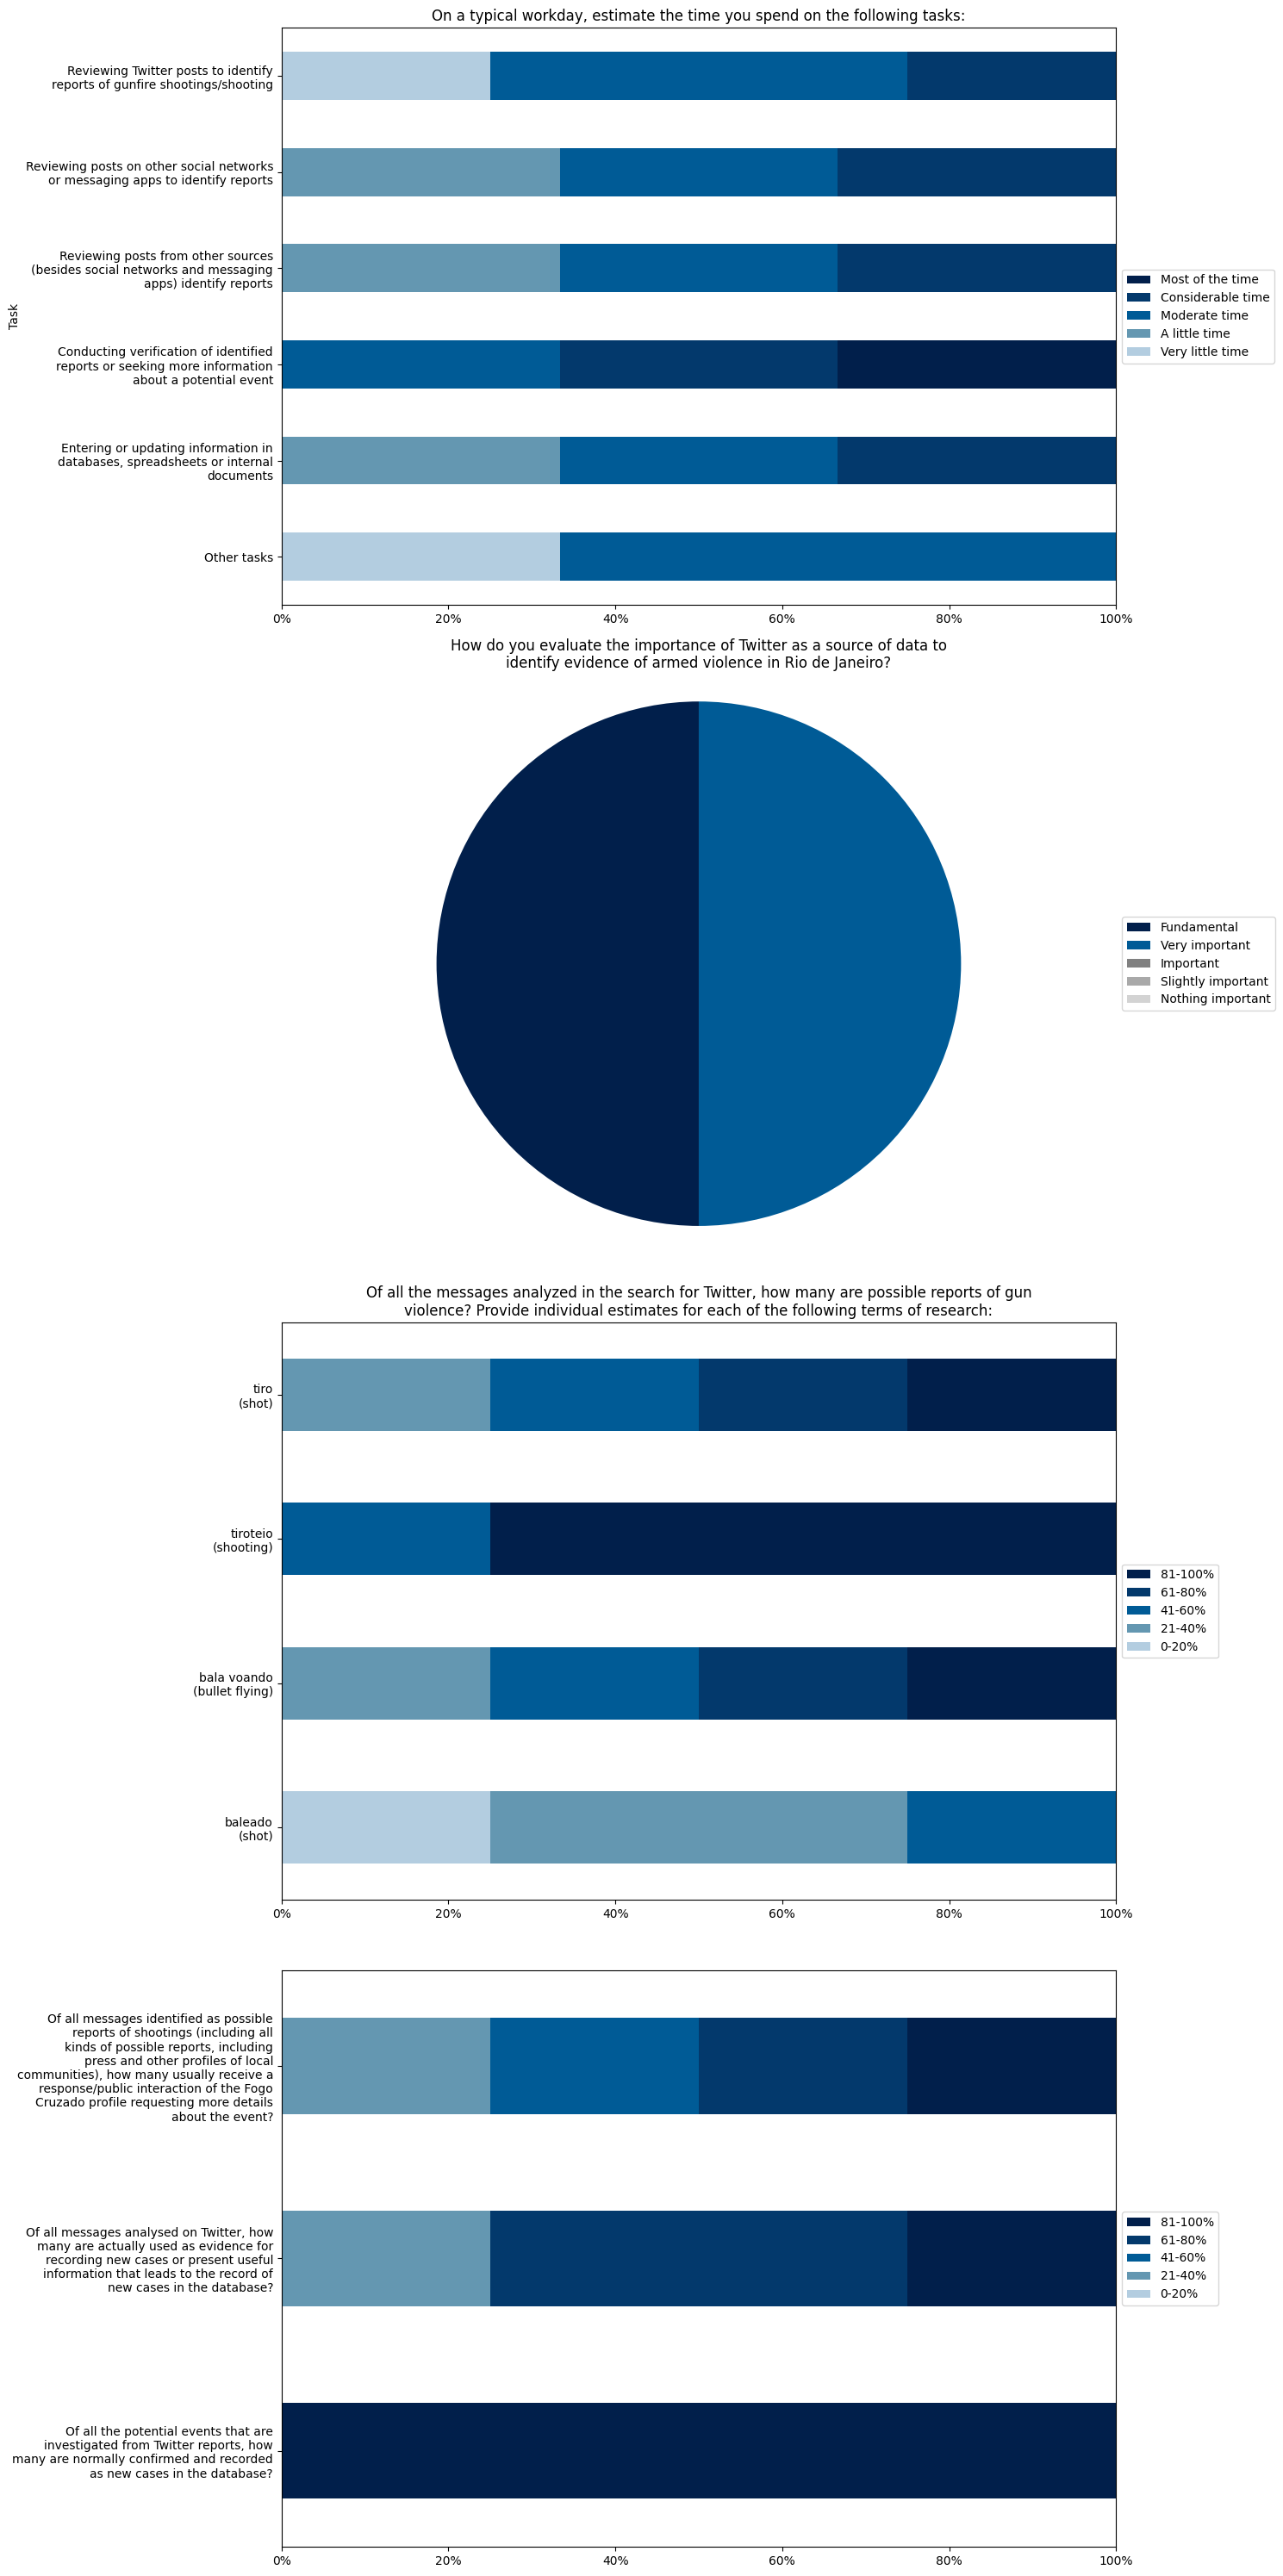

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from textwrap import wrap
from matplotlib.ticker import FuncFormatter

# Function to format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

# Data for the first chart
data1 = {
    'Task': [
        'Reviewing Twitter posts to identify reports of gunfire shootings/shooting',
        'Reviewing posts on other social networks or messaging apps to identify reports',
        'Reviewing posts from other sources (besides social networks and messaging apps) identify reports',
        'Conducting verification of identified reports or seeking more information about a potential event',
        'Entering or updating information in databases, spreadsheets or internal documents',
        'Other tasks'
    ],
    'Very little time': [1, 0, 0, 0, 0, 1],
    'A little time': [0, 1, 1, 0, 1, 0],
    'Moderate time': [2, 1, 1, 1, 1, 2],
    'Considerable time': [1, 1, 1, 1, 1, 0],
    'Most of the time': [0, 0, 0, 1, 0, 0]
}
df1 = pd.DataFrame(data1)
df1.set_index('Task', inplace=True)
df1['Total'] = df1.sum(axis=1)
for col in df1.columns:
    df1[col] = df1[col] / df1['Total']
colors1 = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b']

# Data for the second chart
labels2 = ['Fundamental', 'Very important', 'Important', 'Slightly important', 'Nothing important']
sizes2 = [2, 2, 0, 0, 0]
colors2 = ['#011f4b', '#005b96', 'gray', 'darkgray', 'lightgray']

# Data for the third chart
data3 = {
    '': ['tiro\n(shot)', 'tiroteio\n(shooting)', 'bala voando\n(bullet flying)', 'baleado\n(shot)'],
    '0-20%': [0, 0, 0, 1],
    '21-40%': [1, 0, 1, 2],
    '41-60%': [1, 1, 1, 1],
    '61-80%': [1, 0, 1, 0],
    '81-100%': [1, 3, 1, 0]
}
df3 = pd.DataFrame(data3)
df3.set_index('', inplace=True)
df3['Total'] = df3.sum(axis=1)
for col in df3.columns:
    df3[col] = df3[col] / df3['Total']
colors3 = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b']

# Data for the fourth chart
data4_1 = {
    '': ['Of all messages identified as possible reports of shootings (including all kinds of possible reports, including press and other profiles of local communities), how many usually receive a response/public interaction of the Fogo Cruzado profile requesting more details about the event?'],
    '0-20%': [0],
    '21-40%': [1],
    '41-60%': [1],
    '61-80%': [1],
    '81-100%': [1]
}
data4_2 = {
    '': ['Of all messages analysed on Twitter, how many are actually used as evidence for recording new cases or present useful information that leads to the record of new cases in the database?'],
    '0-20%': [0],
    '21-40%': [1],
    '41-60%': [0],
    '61-80%': [2],
    '81-100%': [1]
}
data4_3 = {
    '': ['Of all the potential events that are investigated from Twitter reports, how many are normally confirmed and recorded as new cases in the database?'],
    '0-20%': [0],
    '21-40%': [0],
    '41-60%': [0],
    '61-80%': [0],
    '81-100%': [1]
}
df4_1 = pd.DataFrame(data4_1).set_index('')
df4_2 = pd.DataFrame(data4_2).set_index('')
df4_3 = pd.DataFrame(data4_3).set_index('')
df_combined = pd.concat([df4_1, df4_2, df4_3])
df_combined['Total'] = df_combined.sum(axis=1)
for col in df_combined.columns:
    if col != 'Total':
        df_combined[col] = df_combined[col] / df_combined['Total']
colors4 = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b']

# Create figure and axes for subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 30))

# Plot for the first chart
df1.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[0], color=colors1)
axs[0].set_title('On a typical workday, estimate the time you spend on the following tasks:')
axs[0].set_yticklabels(['\n'.join(wrap(label, 40)) for label in df1.index])
axs[0].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[0].set_xlim(0, 1)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].invert_yaxis()

# Plot for the second chart
wedges, texts = axs[1].pie(sizes2, colors=colors2, startangle=90, wedgeprops=dict(width=1))
axs[1].axis('equal')
axs[1].legend(wedges, labels2, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
title2 = 'How do you evaluate the importance of Twitter as a source of data to identify evidence of armed violence in Rio de Janeiro?'
axs[1].set_title('\n'.join(wrap(title2, 70)))

# Plot for the third chart
df3.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[2], color=colors3)
title3='Of all the messages analyzed in the search for Twitter, how many are possible reports of gun violence? Provide individual estimates for each of the following terms of research:'
#wrap
title3='\n'.join(wrap(title3, 100))
axs[2].set_title(title3)
axs[2].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[2].set_xlim(0, 1)
axs[2].invert_yaxis()
handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

# Plot for the fourth chart
df_combined.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[3], color=colors4)
title4 = ''
axs[3].set_title('\n'.join(wrap(title4, 100)), pad=20)
axs[3].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[3].set_xlim(0, 1)
axs[3].set_yticklabels(['\n'.join(wrap(label, 40)) for label in df_combined.index])
handles, labels = axs[3].get_legend_handles_labels()
axs[3].legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[3].invert_yaxis()

# Adjust layout and save the combined figure
plt.tight_layout(pad=3.0, h_pad=5.0)
plt.savefig('new_charts/pre_survey.png', dpi=300, bbox_inches='tight')
plt.show()


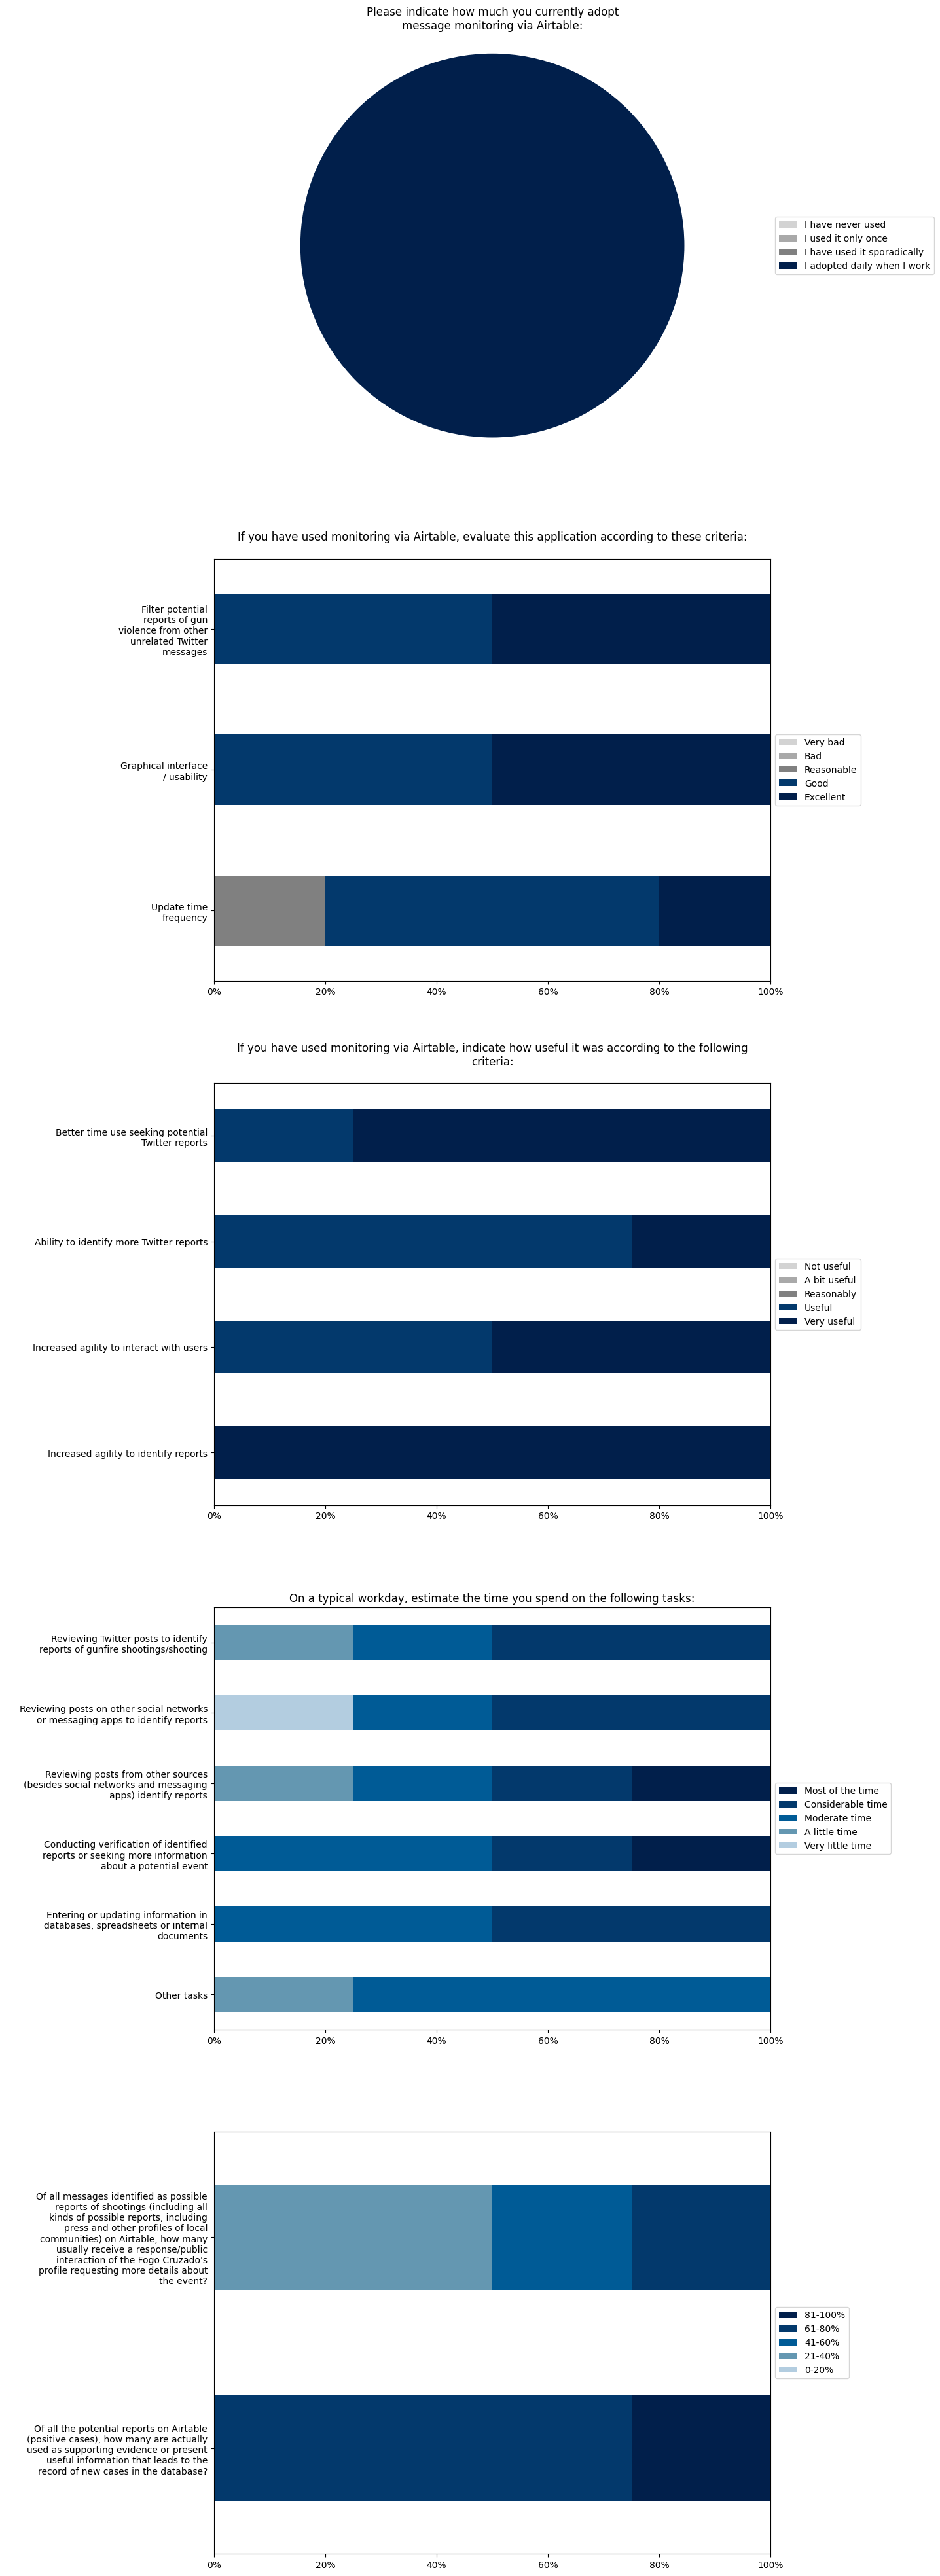

In [31]:
import matplotlib.pyplot as plt
from textwrap import wrap
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Function to format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

# Data for the pie chart
labels_pie1 = [
    'I have never used',
    'I used it only once',
    'I have used it sporadically',
    'I adopted daily when I work'
]
sizes_pie1 = [0, 0, 0, 4]
colors_pie1 = ['lightgray', 'darkgray', 'gray', '#011f4b']

# Data for the first bar chart
data_bar1 = {
    '': [
        'Filter potential reports of gun violence from other unrelated Twitter messages',
        'Graphical interface / usability',
        'Update time frequency'
    ],
    'Very bad': [0, 0, 0],
    'Bad': [0, 0, 0],
    'Reasonable': [0, 0, 1],
    'Good': [2, 2, 3],
    'Excellent': [2, 2, 1]
}
df_bar1 = pd.DataFrame(data_bar1)
df_bar1.set_index('', inplace=True)
df_bar1['Total'] = df_bar1.sum(axis=1)
for col in df_bar1.columns:
    if col != 'Total':
        df_bar1[col] = df_bar1[col] / df_bar1['Total']
colors_bar1 = ['lightgray', 'darkgray', 'gray', '#03396c', '#011f4b']

# Data for the second bar chart
data_bar2 = {
    '': [
        'Better time use seeking potential Twitter reports',
        'Ability to identify more Twitter reports',
        'Increased agility to interact with users',
        'Increased agility to identify reports'
    ],
    'Not useful': [0, 0, 0, 0],
    'A bit useful': [0, 0, 0, 0],
    'Reasonably': [0, 0, 0, 0],
    'Useful': [1, 3, 2, 0],
    'Very useful': [3, 1, 2, 4]
}
df_bar2 = pd.DataFrame(data_bar2)
df_bar2.set_index('', inplace=True)
df_bar2['Total'] = df_bar2.sum(axis=1)
for col in df_bar2.columns:
    if col != 'Total':
        df_bar2[col] = df_bar2[col] / df_bar2['Total']
colors_bar2 = ['lightgray', 'darkgray', 'gray', '#03396c', '#011f4b']

# Data for the third bar chart
data_bar3 = {
    ' ': [
        'Reviewing Twitter posts to identify reports of gunfire shootings/shooting',
        'Reviewing posts on other social networks or messaging apps to identify reports',
        'Reviewing posts from other sources (besides social networks and messaging apps) identify reports',
        'Conducting verification of identified reports or seeking more information about a potential event',
        'Entering or updating information in databases, spreadsheets or internal documents',
        'Other tasks'
    ],
    'Very little time': [0, 1, 0, 0, 0, 0],
    'A little time': [1, 0, 1, 0, 0, 1],
    'Moderate time': [1, 1, 1, 2, 2, 3],
    'Considerable time': [2, 2, 1, 1, 2, 0],
    'Most of the time': [0, 0, 1, 1, 0, 0]
}
df_bar3 = pd.DataFrame(data_bar3)
df_bar3.set_index(' ', inplace=True)
df_bar3['Total'] = df_bar3.sum(axis=1)
for col in df_bar3.columns:
    df_bar3[col] = df_bar3[col] / df_bar3['Total']
colors_bar3 = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b']

# Data for the fourth bar chart
data_bar4_1 = {
    '': ["Of all messages identified as possible reports of shootings (including all kinds of possible reports, including press and other profiles of local communities) on Airtable, how many usually receive a response/public interaction of the Fogo Cruzado's profile requesting more details about the event?"],
    '0-20%': [0],
    '21-40%': [2],
    '41-60%': [1],
    '61-80%': [1],
    '81-100%': [0]
}
data_bar4_2 = {
    '': ['Of all the potential reports on Airtable (positive cases), how many are actually used as supporting evidence or present useful information that leads to the record of new cases in the database?'],
    '0-20%': [0],
    '21-40%': [0],
    '41-60%': [0],
    '61-80%': [3],
    '81-100%': [1]
}
df_bar4_1 = pd.DataFrame(data_bar4_1).set_index('')
df_bar4_2 = pd.DataFrame(data_bar4_2).set_index('')
df_combined = pd.concat([df_bar4_1, df_bar4_2])
df_combined['Total'] = df_combined.sum(axis=1)
for col in df_combined.columns:
    if col != 'Total':
        df_combined[col] = df_combined[col] / df_combined['Total']
colors_bar4 = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b']

# Create figure and axes for subplots
fig, axs = plt.subplots(5, 1, figsize=(15, 40))

# Plot for the first pie chart
wedges, texts = axs[0].pie(sizes_pie1, colors=colors_pie1, startangle=90)
axs[0].axis('equal')
axs[0].legend(wedges, labels_pie1, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
title_pie1 = 'Please indicate how much you currently adopt message monitoring via Airtable:'
axs[0].set_title('\n'.join(wrap(title_pie1, 50)))

# Plot for the first bar chart
df_bar1.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[1], color=colors_bar1)
title_bar1 = 'If you have used monitoring via Airtable, evaluate this application according to these criteria:'
axs[1].set_title('\n'.join(wrap(title_bar1, 100)), pad=20)
axs[1].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[1].set_xlim(0, 1)
axs[1].set_yticklabels(['\n'.join(wrap(label, 20)) for label in df_bar1.index])
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].invert_yaxis()

# Plot for the second bar chart
df_bar2.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[2], color=colors_bar2)
title_bar2 = 'If you have used monitoring via Airtable, indicate how useful it was according to the following criteria:'
axs[2].set_title('\n'.join(wrap(title_bar2, 100)), pad=20)
axs[2].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[2].set_xlim(0, 1)
axs[2].set_yticklabels(['\n'.join(wrap(label, 40)) for label in df_bar2.index])
handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles, labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))
axs[2].invert_yaxis()

# Plot for the third bar chart
df_bar3.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[3], color=colors_bar3)
title_bar3 = 'On a typical workday, estimate the time you spend on the following tasks:'
axs[3].set_title(title_bar3)
axs[3].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[3].set_xlim(0, 1)
axs[3].set_yticklabels(['\n'.join(wrap(label, 40)) for label in df_bar3.index])
handles, labels = axs[3].get_legend_handles_labels()
axs[3].legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[3].invert_yaxis()

# Plot for the fourth bar chart
df_combined.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=axs[4], color=colors_bar4)
title_bar4 = ''
axs[4].set_title('\n'.join(wrap(title_bar4, 100)), pad=20)
axs[4].xaxis.set_major_formatter(FuncFormatter(to_percentage))
axs[4].set_xlim(0, 1)
axs[4].set_yticklabels(['\n'.join(wrap(label, 40)) for label in df_combined.index])
handles, labels = axs[4].get_legend_handles_labels()
axs[4].legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[4].invert_yaxis()

# Adjust layout and save the combined figure
plt.tight_layout(pad=3.0, h_pad=5.0)
plt.savefig('new_charts/survey_post.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# import pandas as pd
# from textwrap import wrap
# from matplotlib.ticker import FuncFormatter

# # Input data with counts for each category
# data = {
#     'Task': [
#         'Reviewing Twitter posts to identify reports of gunfire shootings/shooting',
#         'Reviewing posts on other social networks or messaging apps to identify reports',
#         'Reviewing posts from other sources (besides social networks and messaging apps) identify reports',
#         'Conducting verification of identified reports or seeking more information about a potential event',
#         'Entering or updating information in databases, spreadsheets or internal documents',
#         'Other tasks'
#     ],
#     'Very little time': [1, 0, 0, 0, 0, 1],
#     'A little time': [0, 1, 1, 0, 1, 0],
#     'Moderate time': [2, 1, 1, 1, 1, 2],
#     'Considerable time': [1, 1, 1, 1, 1, 0],
#     'Most of the time': [0, 0, 0, 1, 0, 0]
# }

# # Convert the data to a DataFrame
# df = pd.DataFrame(data)

# # Define a color palette from light to dark blue
# colors = [
#     '#b3cde0',  # Very little time
#     '#6497b1',  # A little time
#     '#005b96',  # Moderate time
#     '#03396c',  # Considerable time
#     '#011f4b'   # Most of the time
# ]

# # Set the Task column as the index
# df.set_index('Task', inplace=True)

# # Calculate the total responses for each task
# df['Total'] = df.sum(axis=1)

# # Calculate the percentage for each time category
# for col in df.columns:
#     df[col] = df[col] / df['Total']

# # Plotting the stacked bar chart with the custom color palette
# fig, ax = plt.subplots(figsize=(12, 8))
# df.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# # Adding title and labels
# ax.set_title('On a typical workday, estimate the time you spend on the following tasks:')

# # Add line breaks to y-axis labels
# labels = [ '\n'.join(wrap(label, 40)) for label in df.index]
# ax.set_yticklabels(labels)

# # Format x-axis as percentage
# def to_percentage(x, pos):
#     return '{:.0f}%'.format(x * 100)

# formatter = FuncFormatter(to_percentage)
# ax.xaxis.set_major_formatter(formatter)

# # Set x-axis limit to 100%
# ax.set_xlim(0, 1)

# # Move the legend to the right side and reverse the order
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

# # Invert y-axis
# ax.invert_yaxis()

# plt.tight_layout()
# # Save the plot
# fig.savefig('new_charts/pre_q1.png', dpi=300, bbox_inches='tight')

# plt.show()



In [22]:
# import matplotlib.pyplot as plt
# from textwrap import wrap

# # Data for the chart
# labels = ['Fundamental', 'Very important', 'Important', 'Slightly important', 'Nothing important']
# sizes = [2, 2, 0, 0, 0]

# colors = [
#     'lightgray',  
#     'darkgray', 
#     'gray', 
#     '#005b96',  
#     '#011f4b'  
# ]

# new_color = colors[::-1]

# # Plotting the pie chart
# fig, ax = plt.subplots(figsize=(8, 6))

# wedges, texts = ax.pie(sizes, colors=new_color, startangle=90, wedgeprops=dict(width=1))

# # Equal aspect ratio ensures that pie is drawn as a circle
# ax.axis('equal')

# # Adding legend
# plt.legend(wedges, labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# # Add line breaks to y-axis labels
# mytitle = 'How do you evaluate the importance of Twitter as a source of data to identify evidence of armed violence in Rio de Janeiro?'
# # wrap title
# mytitle = '\n'.join(wrap(mytitle, 70))

# # Adding title
# plt.title(mytitle)
# plt.savefig('new_charts/pre_q2.png', dpi=300, bbox_inches='tight')
# plt.show()


In [23]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# import pandas as pd
# from textwrap import wrap
# from matplotlib.ticker import FuncFormatter

# # Input data with counts for each category
# data = {
#     'Term': ['tiro\n(shot)', 'tiroteio\n(shooting)', 'bala voando\n(bullet flying)', 'baleado\n(shot)'],
#     '0-20%': [0, 0, 0, 1],
#     '21-40%': [1, 0, 1, 2],
#     '41-60%': [1, 1, 1, 1],
#     '61-80%': [1, 0, 1, 0],
#     '81-100%': [1, 3, 1, 0]
# }

# # Convert the data to a DataFrame
# df = pd.DataFrame(data)

# # Set the Term column as the index
# df.set_index('Term', inplace=True)

# # Define a color palette from light to dark blue
# colors = [
#     '#b3cde0',  # 0-20%
#     '#6497b1',  # 21-40%
#     '#005b96',  # 41-60%
#     '#03396c',  # 61-80%
#     '#011f4b'   # 81-100%
# ]

# # Calculate the total responses for each task
# df['Total'] = df.sum(axis=1)

# # Calculate the percentage for each time category
# for col in df.columns:
#     df[col] = df[col] / df['Total']

# # Plotting the stacked bar chart with the custom color palette
# fig, ax = plt.subplots(figsize=(12, 8))
# df.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# # Adding title and labels
# ax.set_title('Of all the messages analyzed in the search for Twitter, how many are possible\nreports of gun violence? Provide individual estimates for each of the following terms of research:')

# # Format x-axis as percentage
# def to_percentage(x, pos):
#     return '{:.0f}%'.format(x * 100)

# formatter = FuncFormatter(to_percentage)
# ax.xaxis.set_major_formatter(formatter)

# # Set x-axis limit to 100%
# ax.set_xlim(0, 1)
# # invert y-axis
# plt.gca().invert_yaxis()
# # Move the legend to the right side
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

# plt.tight_layout()
# plt.savefig('new_charts/pre_q3.png', dpi=300, bbox_inches='tight')
# plt.show()


In [24]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# import pandas as pd
# from textwrap import wrap
# from matplotlib.ticker import FuncFormatter

# # First dataset
# data1 = {
#     '': ['Of all messages identified as possible reports of shootings (including all kinds of possible reports, including press and other profiles of local communities), how many usually receive a response/public interaction of the Fogo Cruzado profile requesting more details about the event?'],
#     '0-20%': [0],
#     '21-40%': [1],
#     '41-60%': [1],
#     '61-80%': [1],
#     '81-100%': [1]
# }

# # Second dataset
# data2 = {
#     '': ['Of all messages analysed on Twitter, how many are actually used as evidence for recording new cases or present useful information that leads to the record of new cases in the database?'],
#     '0-20%': [0],
#     '21-40%': [1],
#     '41-60%': [0],
#     '61-80%': [2],
#     '81-100%': [1]
# }

# data3 = {
#     '': ['Of all the potential events that are investigated from Twitter reports, how many are normally confirmed and recorded as new cases in the database?'],
#     '0-20%': [0],
#     '21-40%': [0],
#     '41-60%': [0],
#     '61-80%': [0],
#     '81-100%': [1]
# }

# # Convert the data to DataFrames
# df1 = pd.DataFrame(data1).set_index('')
# df2 = pd.DataFrame(data2).set_index('')
# df3 = pd.DataFrame(data3).set_index('')

# # Combine the data into a single DataFrame
# df_combined = pd.concat([df1, df2,df3])

# # Define a color palette from light to dark blue
# colors = [
#     '#b3cde0',  # 0-20%
#     '#6497b1',  # 21-40%
#     '#005b96',  # 41-60%
#     '#03396c',  # 61-80%
#     '#011f4b'   # 81-100%
# ]

# # Calculate the total responses for each category
# df_combined['Total'] = df_combined.sum(axis=1)

# # Calculate the percentage for each time category
# for col in df_combined.columns:
#     if col != 'Total':
#         df_combined[col] = df_combined[col] / df_combined['Total']

# # Plotting the stacked bar chart with the custom color palette
# fig, ax = plt.subplots(figsize=(10, 6))

# df_combined.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# # Adding title and labels
# title = ''
# ax.set_title('\n'.join(wrap(title, 100)), pad=20)

# # Format x-axis as percentage
# def to_percentage(x, pos):
#     return '{:.0f}%'.format(x * 100)

# formatter = FuncFormatter(to_percentage)
# ax.xaxis.set_major_formatter(formatter)

# # Set x-axis limit to 100%
# ax.set_xlim(0, 1)

# # wraṕ y-axis labels
# labels = df_combined.index
# wrap_labels = [ '\n'.join(wrap(label, 40)) for label in labels]
# ax.set_yticklabels(wrap_labels)

# # Move the legend to the right side
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
# # invert y_axis
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.savefig('new_charts/pre_q4to6.png', dpi=300, bbox_inches='tight')

# plt.show()

# # Save the plot


# Pos


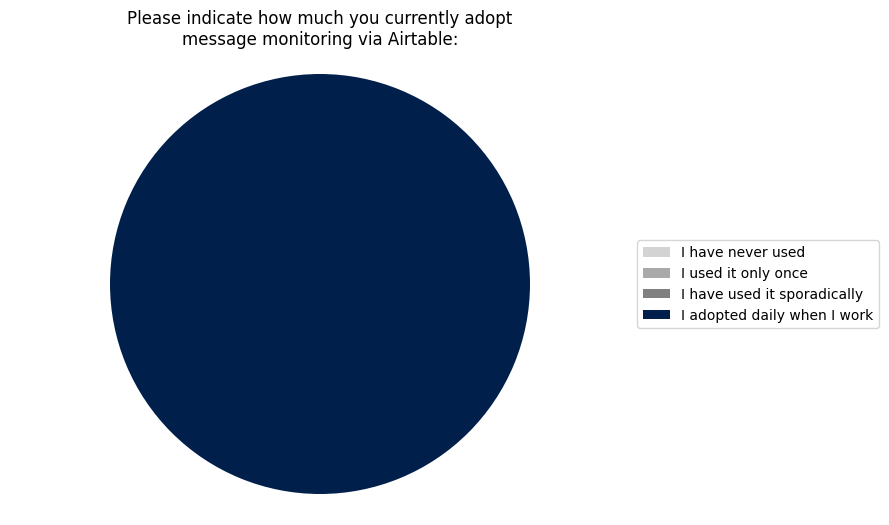

In [25]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Data for the chart
labels = [
    'I have never used',
    'I used it only once',
    'I have used it sporadically',
    'I adopted daily when I work'
]
sizes = [0, 0, 0, 4]

colors = [
    'lightgray',  
    'darkgray',  
    'gray',  # I have used it sporadically
    '#011f4b'   # I adopted daily when I work
]

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts = ax.pie(sizes, colors=colors, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Adding legend
plt.legend(wedges, labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add line breaks to y-axis labels
mytitle = 'Please indicate how much you currently adopt message monitoring via Airtable:'
# wrap title
mytitle = '\n'.join(wrap(mytitle, 50))

# Adding title
plt.title(mytitle)

# Save the plot
plt.savefig('new_charts/pos_q1.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


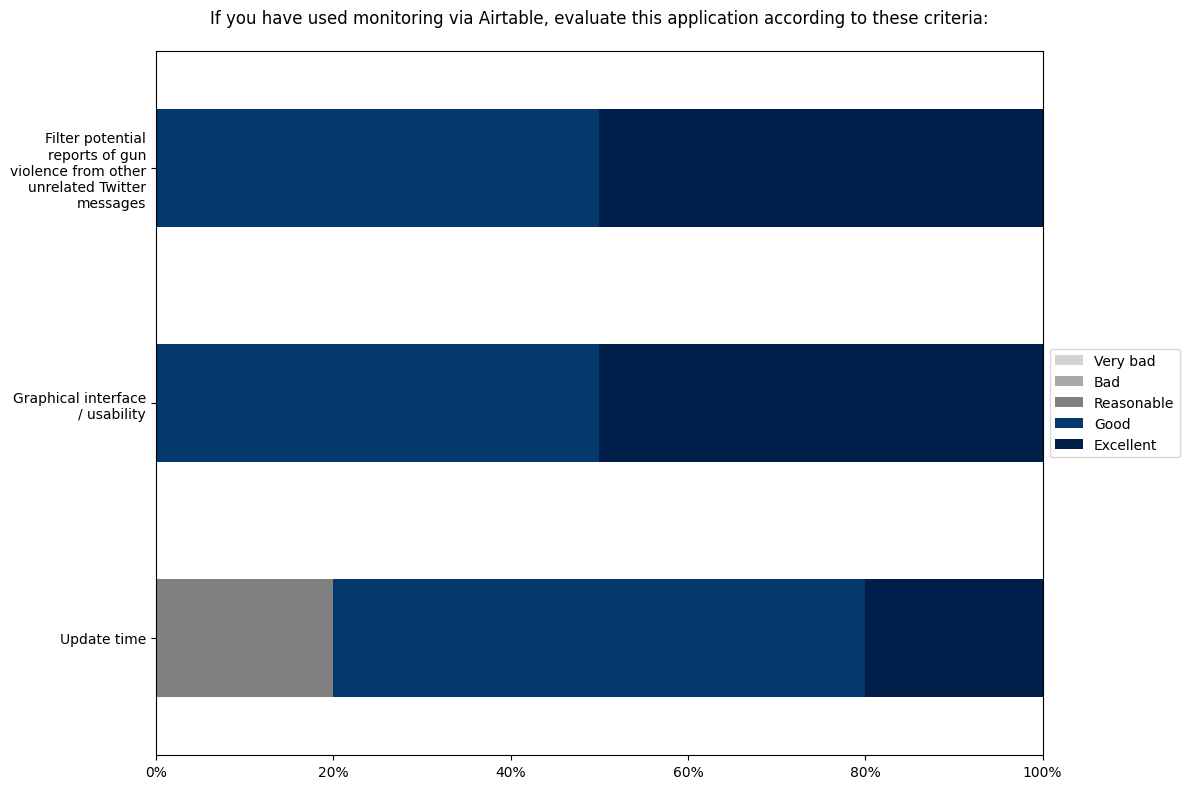

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from textwrap import wrap
from matplotlib.ticker import FuncFormatter

# Data for the chart
data = {
    '': [
        'Filter potential reports of gun violence from other unrelated Twitter messages',
        'Graphical interface / usability',
        'Update time'
    ],
    'Very bad': [0, 0, 0],
    'Bad': [0, 0, 0],
    'Reasonable': [0, 0, 1],
    'Good': [2, 2, 3],
    'Excellent': [2, 2, 1]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Set the  column as the index
df.set_index('', inplace=True)

# Define a color palette from light to dark blue
colors = [
    'lightgray',  # Very bad
    'darkgray',  # Bad
    'gray',  # Reasonable
    '#03396c',  # Good
    '#011f4b'   # Excellent
]

# Calculate the total responses for each criterion
df['Total'] = df.sum(axis=1)

# Calculate the percentage for each time category
for col in df.columns:
    if col != 'Total':
        df[col] = df[col] / df['Total']

# Plotting the stacked bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(12, 8))
df.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# Adding title and labels
title = 'If you have used monitoring via Airtable, evaluate this application according to these criteria:'
ax.set_title('\n'.join(wrap(title, 100)), pad=20)

# Format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

formatter = FuncFormatter(to_percentage)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limit to 100%
ax.set_xlim(0, 1)

# Wrap y-axis labels
labels = df.index
wrap_labels = [ '\n'.join(wrap(label, 20)) for label in labels]
ax.set_yticklabels(wrap_labels)

# Move the legend to the right side
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))

# Invert y-axis
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the plot
plt.savefig('new_charts/pos_q2.png', dpi=300, bbox_inches='tight')

plt.show()


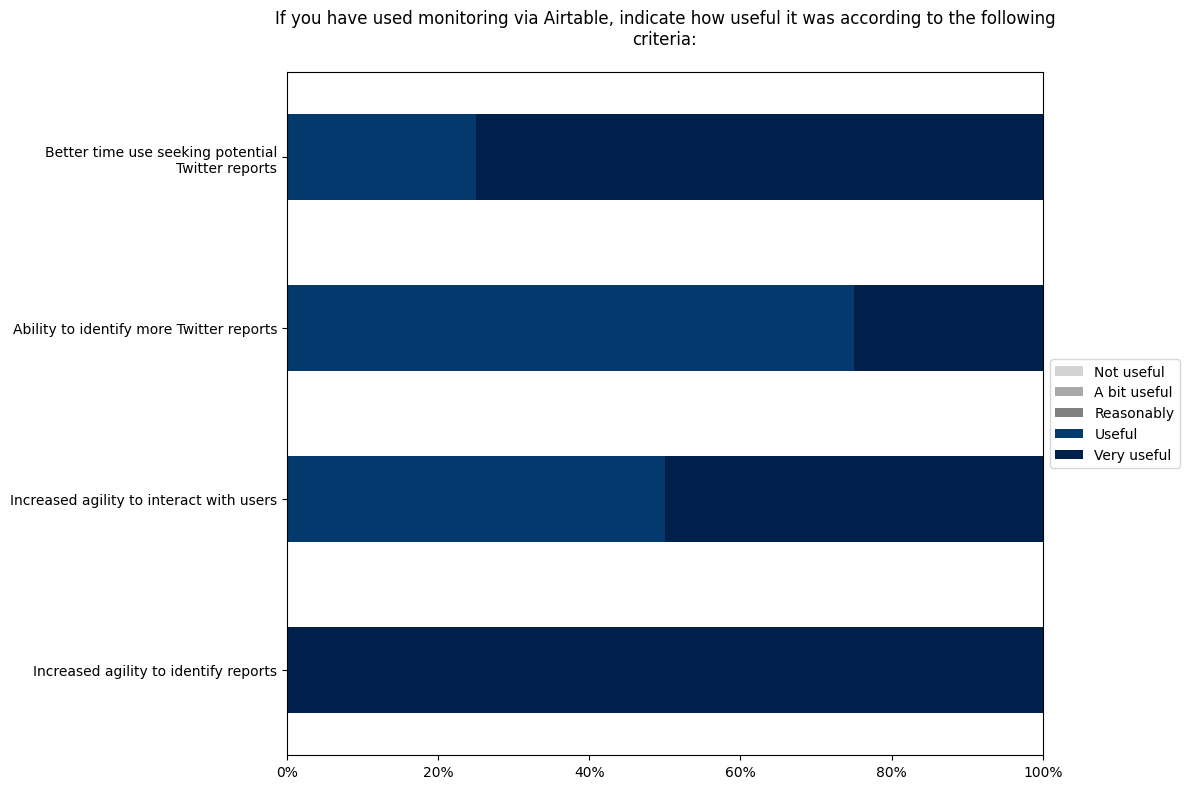

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import wrap
from matplotlib.ticker import FuncFormatter

# Data for the chart
data = {
    '': [
        'Better time use seeking potential Twitter reports',
        'Ability to identify more Twitter reports',
        'Increased agility to interact with users',
        'Increased agility to identify reports'
    ],
    'Not useful': [0, 0, 0, 0],
    'A bit useful': [0, 0, 0, 0],
    'Reasonably': [0, 0, 0, 0],
    'Useful': [1, 3, 2, 0],
    'Very useful': [3, 1, 2, 4]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Set the  column as the index
df.set_index('', inplace=True)


# Calculate the total responses for each criterion
df['Total'] = df.sum(axis=1)

# Calculate the percentage for each time category
for col in df.columns:
    if col != 'Total':
        df[col] = df[col] / df['Total']

# Define a color palette from light to dark blue
colors = [
    'lightgray',  # Very bad
    'darkgray',  # Bad
    'gray',  # Reasonable
    '#03396c',  # Good
    '#011f4b'   # Excellent
]

# Plotting the stacked bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(12, 8))
df.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# Adding title and labels
title = 'If you have used monitoring via Airtable, indicate how useful it was according to the following criteria:'
ax.set_title('\n'.join(wrap(title, 100)), pad=20)

# Format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

formatter = FuncFormatter(to_percentage)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limit to 100%
ax.set_xlim(0, 1)

# Wrap y-axis labels
labels = df.index
wrap_labels = [ '\n'.join(wrap(label, 40)) for label in labels]
ax.set_yticklabels(wrap_labels)

# Move the legend to the right side
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", loc="center left", bbox_to_anchor=(1, 0.5))

# Invert y-axis
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the plot
fig.savefig('new_charts/pre_q4.png', dpi=300, bbox_inches='tight')

plt.show()


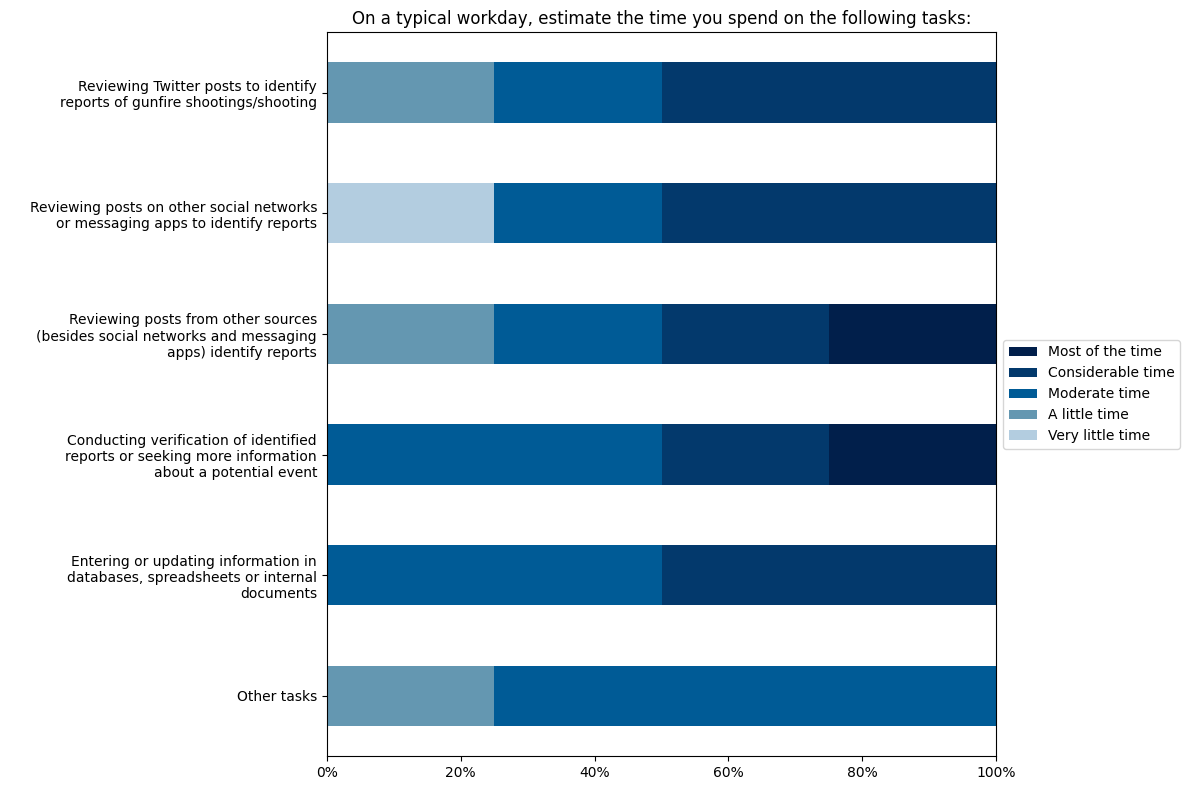

In [28]:

# Input data with counts for each category
data = {
    ' ': [
        'Reviewing Twitter posts to identify reports of gunfire shootings/shooting',
        'Reviewing posts on other social networks or messaging apps to identify reports',
        'Reviewing posts from other sources (besides social networks and messaging apps) identify reports',
        'Conducting verification of identified reports or seeking more information about a potential event',
        'Entering or updating information in databases, spreadsheets or internal documents',
        'Other tasks'
    ],
    'Very little time': [0, 1, 0, 0, 0, 0],
    'A little time': [1, 0, 1, 0, 0, 1],
    'Moderate time': [1, 1, 1, 2, 2, 3],
    'Considerable time': [2, 2, 1, 1, 2, 0],
    'Most of the time': [0, 0, 1, 1, 0, 0]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Define a color palette from light to dark blue
colors = [
    '#b3cde0',  # Very little time
    '#6497b1',  # A little time
    '#005b96',  # Moderate time
    '#03396c',  # Considerable time
    '#011f4b'   # Most of the time
]

# Set the Task column as the index
df.set_index(' ', inplace=True)

# Calculate the total responses for each task
df['Total'] = df.sum(axis=1)

# Calculate the percentage for each time category
for col in df.columns:
    df[col] = df[col] / df['Total']

# Plotting the stacked bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(12, 8))
df.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# Adding title and labels
ax.set_title('On a typical workday, estimate the time you spend on the following tasks:')

# Add line breaks to y-axis labels
labels = [ '\n'.join(wrap(label, 40)) for label in df.index]
ax.set_yticklabels(labels)

# Format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

formatter = FuncFormatter(to_percentage)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limit to 100%
ax.set_xlim(0, 1)

# Move the legend to the right side and reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

# Invert y-axis
ax.invert_yaxis()

plt.tight_layout()

# Save the plot
fig.savefig('new_charts/pre_q4.png', dpi=300, bbox_inches='tight')

plt.show()


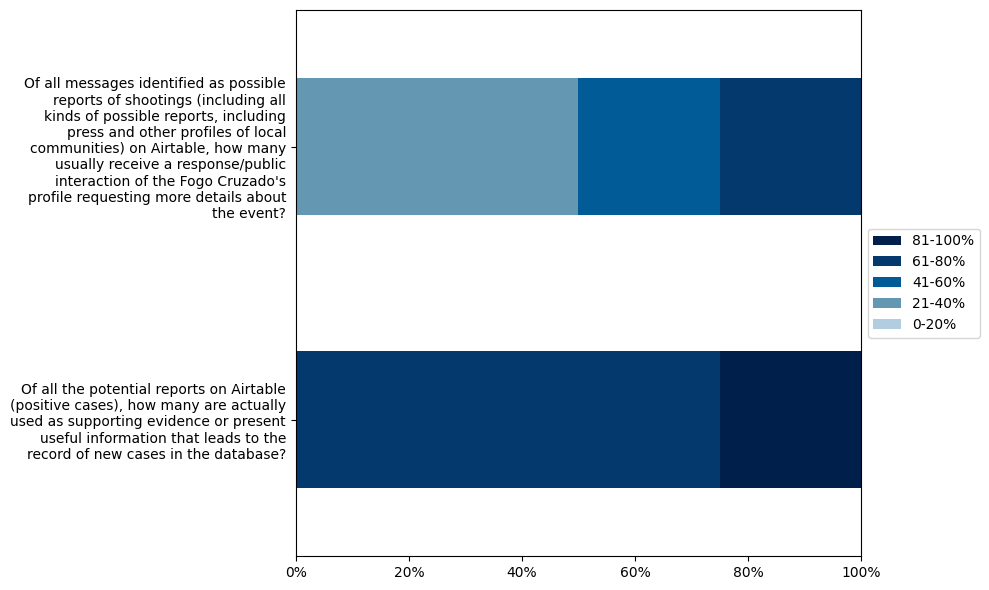

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from textwrap import wrap
from matplotlib.ticker import FuncFormatter

# First dataset
data1 = {
    '': ["Of all messages identified as possible reports of shootings (including all kinds of possible reports, including press and other profiles of local communities) on Airtable, how many usually receive a response/public interaction of the Fogo Cruzado's profile requesting more details about the event?"],
    '0-20%': [0],
    '21-40%': [2],
    '41-60%': [1],
    '61-80%': [1],
    '81-100%': [0]
}

# Second dataset
data2 = {
    '': ['Of all the potential reports on Airtable (positive cases), how many are actually used as supporting evidence or present useful information that leads to the record of new cases in the database?'],
    '0-20%': [0],
    '21-40%': [0],
    '41-60%': [0],
    '61-80%': [3],
    '81-100%': [1]
}


# Convert the data to DataFrames
df1 = pd.DataFrame(data1).set_index('')
df2 = pd.DataFrame(data2).set_index('')

# Combine the data into a single DataFrame
df_combined = pd.concat([df1, df2])

# Define a color palette from light to dark blue
colors = [
    '#b3cde0',  # 0-20%
    '#6497b1',  # 21-40%
    '#005b96',  # 41-60%
    '#03396c',  # 61-80%
    '#011f4b'   # 81-100%
]

# Calculate the total responses for each 
df_combined['Total'] = df_combined.sum(axis=1)

# Calculate the percentage for each time 
for col in df_combined.columns:
    if col != 'Total':
        df_combined[col] = df_combined[col] / df_combined['Total']

# Plotting the stacked bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(10, 6))

df_combined.drop('Total', axis=1).plot(kind='barh', stacked=True, ax=ax, color=colors)

# Adding title and labels
title = ''
ax.set_title('\n'.join(wrap(title, 100)), pad=20)

# Format x-axis as percentage
def to_percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

formatter = FuncFormatter(to_percentage)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limit to 100%
ax.set_xlim(0, 1)

# wraṕ y-axis labels
labels = df_combined.index
wrap_labels = [ '\n'.join(wrap(label, 40)) for label in labels]
ax.set_yticklabels(wrap_labels)

# Move the legend to the right side
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))
# invert y_axis
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('new_charts/pre_q5to6.png', dpi=300, bbox_inches='tight')

plt.show()
